In [98]:
import os
import sys
import json

sys.path.append(os.path.abspath(".."))
import helpers  # Import the helpers module from the parent directory

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path

import importlib
importlib.reload(helpers) 


pd.reset_option("display.max_rows")
pd.reset_option("display.max_columns")
pd.reset_option("display.width")
pd.reset_option("display.max_colwidth")

# Standardizing Plots
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['legend.loc'] = 'upper left'
plt.rcParams['legend.fancybox'] = True
plt.rcParams['figure.figsize'] = (10, 6)

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'

### Factor Dictionary Paths

In [99]:
#Read in file and turn it into a dataframe

Cr_data_path = "Cr_data/Cr_fd_3_10_2025"
Cr_oxide_data_path = "Cr_oxide_data/Cr_oxide_fd_4_2_2025"
Cu_data_path = "Cu_data/Cu_fd_2_24_2025"
Fe_data_path = "Fe_data/Fe_fd_2_24_2025"

test_for_big_dataset = "../transformed_data/test_for_big_dataset/factor_df_6_7_2025"

#### Generate Factor and Spectra DF

In [100]:
normalization_orders = [7] #Specifys the normalization factors for DM QM and S

factor_df, spectra_df = helpers.generate_factor_sam_df(test_for_big_dataset, mat_props = True, dipole = True, quadrupole = True, steinhart=True, normalization_orders=normalization_orders, ox = False, spectra = True)

# Display the DataFrame
print(factor_df.head())
print(factor_df.shape[0])


           chemical_formula cif_name central_atom  space_group_number  \
material                                                                
mp-1518805       NdEuHfCrO6  unknown           Cr                 216   
mp-2218121       MgCr(WO4)2  unknown           Cr                   1   
mp-755220        Li3CrNi3O8  unknown           Cr                  12   
mp-1183696           CrCuO3  unknown           Cr                 221   
mp-1183712           CrGeO3  unknown           Cr                 221   

            average_bond_length  bond_length_std  average_bond_angle  \
material                                                               
mp-1518805                    0                0                   0   
mp-2218121                    0                0                   0   
mp-755220                     0                0                   0   
mp-1183696                    0                0                   0   
mp-1183712                    0                0        

Drop chemical info

In [101]:
factor_df = factor_df.drop(columns = ["average_bond_length", "bond_length_std", "average_bond_angle", "bond_angle_std", "number_of_unique_ligands"])

Clean data 

In [102]:
factor_df, spectra_df, dropped_factor_df = helpers.align_dataframes(factor_df, spectra_df)

Dropped duplicate indices:
Empty DataFrame
Columns: [chemical_formula, cif_name, central_atom, space_group_number, average_electronegativity, std_electronegativity, band_gap, density, oxidation_states, dam_1/^7_0, dam_1/^7_1, dam_1/^7_2, dam_1/^7_3, dam_1/^7_4, dam_1/^7_5, dam_1/^7_6, dam_1/^7_7, dam_1/^7_8, dams_1/r^7, qam_1/^7_0, qam_1/^7_1, qam_1/^7_2, qam_1/^7_3, qam_1/^7_4, qam_1/^7_5, qam_1/^7_6, qam_1/^7_7, qam_1/^7_8, qams_1/r^7, steinhart_vector_0, steinhart_vector_sum]
Index: []

[0 rows x 31 columns]

Dropped due to NaN entries:
Empty DataFrame
Columns: [chemical_formula, cif_name, central_atom, space_group_number, average_electronegativity, std_electronegativity, band_gap, density, oxidation_states, dam_1/^7_0, dam_1/^7_1, dam_1/^7_2, dam_1/^7_3, dam_1/^7_4, dam_1/^7_5, dam_1/^7_6, dam_1/^7_7, dam_1/^7_8, dams_1/r^7, qam_1/^7_0, qam_1/^7_1, qam_1/^7_2, qam_1/^7_3, qam_1/^7_4, qam_1/^7_5, qam_1/^7_6, qam_1/^7_7, qam_1/^7_8, qams_1/r^7, steinhart_vector_0, steinhart_vector_su

Check the cleaning and alligning

In [103]:
print("factor_df")
print(factor_df.head(5))
print(factor_df.tail(5))
print("anisotropy_matrix_df")
print(spectra_df.head(5))
print(spectra_df.tail(5))
print(factor_df.shape[0])
print(spectra_df.shape[0])

factor_df
           chemical_formula cif_name central_atom  space_group_number  \
material                                                                
mp-1024044          Mg3CrO4  unknown           Cr                 221   
mp-1030818        NaMg6CrO8  unknown           Cr                 123   
mp-1030883        Mg6CrSiO8  unknown           Cr                 123   
mp-1031027        LiMg6CrO8  unknown           Cr                 123   
mp-1031245         KMg6CrO8  unknown           Cr                 123   

            average_electronegativity  std_electronegativity  band_gap  \
material                                                                 
mp-1024044                   2.415827               1.032000    0.0000   
mp-1030818                   2.374282               1.075373    2.1237   
mp-1030883                   2.429485               1.023459    2.0172   
mp-1031027                   2.373261               1.070004    2.5121   
mp-1031245                   2.437

Compute normed spacegroup number

In [104]:
factor_df = helpers.compute_normed_spacegroup_number(factor_df)

print(factor_df)


           chemical_formula cif_name central_atom  space_group_number  \
material                                                                
mp-1024044          Mg3CrO4  unknown           Cr                 221   
mp-1030818        NaMg6CrO8  unknown           Cr                 123   
mp-1030883        Mg6CrSiO8  unknown           Cr                 123   
mp-1031027        LiMg6CrO8  unknown           Cr                 123   
mp-1031245         KMg6CrO8  unknown           Cr                 123   
...                     ...      ...          ...                 ...   
mp-798760     CrH10S2(NO2)4  unknown           Cr                   2   
mp-801251       VCrP2(O4F)2  unknown           Cr                   2   
mp-849774          V16CrO41  unknown           Cr                  25   
mp-866101            AcCrO3  unknown           Cr                 221   
mp-996996            CrAuO2  unknown           Cr                 166   

            average_electronegativity  std_electro

Sum anisotropy matrix elements

In [105]:
spectra_df = helpers.compute_off_diagonal_sum(spectra_df, normalize=True)

print(spectra_df)


            sam_m00       sam_m01   sam_m02       sam_m10  sam_m11  \
material                                                             
mp-1024044      0.0  4.703233e-06  0.000005  4.703233e-06      0.0   
mp-1030818      0.0  1.708919e-07  0.051754  1.708919e-07      0.0   
mp-1030883      0.0  1.850886e-07  0.035395  1.850886e-07      0.0   
mp-1031027      0.0  1.362048e-07  0.034190  1.362048e-07      0.0   
mp-1031245      0.0  1.706878e-07  0.042011  1.706878e-07      0.0   
...             ...           ...       ...           ...      ...   
mp-798760       0.0  6.880188e-02  0.068837  6.880188e-02      0.0   
mp-801251       0.0  6.292841e-02  0.059548  6.292841e-02      0.0   
mp-849774       0.0  8.021089e-02  0.084569  8.021089e-02      0.0   
mp-866101       0.0  4.072945e-07  0.000004  4.072945e-07      0.0   
mp-996996       0.0  3.315647e-02  0.033157  3.315647e-02      0.0   

                 sam_m12   sam_m20       sam_m21  sam_m22      sams  
material           

Compute the Aniso DM and QM sum for each normalization

In [106]:
# Create a dictionary to hold the new calculated columns
aniso_qm_dm_sum = {}

for n in normalization_orders:
    for m in normalization_orders:
        aniso_qm_dm_sum[f"dams_1/r^{m}_qams_1/r^{n}"] = factor_df[f"dams_1/r^{m}"] + factor_df[f"qams_1/r^{n}"]

# Convert the dictionary to a DataFrame
aniso_qm_dm_sum_df = pd.DataFrame(aniso_qm_dm_sum)

# Efficiently combine with the original DataFrame
factor_df = pd.concat([factor_df, aniso_qm_dm_sum_df], axis=1)


In [107]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error


columns_to_use_1 = [
    "dams_1/r^7_qams_1/r^7", "dams_1/r^7", "qams_1/r^7",
    "dam_1/^7_1", "dam_1/^7_2", "dam_1/^7_5",
    "qam_1/^7_1", "qam_1/^7_2", "qam_1/^7_5",
    "band_gap", "density", "average_electronegativity", "normed_space_group_number"
]


columns_to_use = columns_to_use_1

X = factor_df[columns_to_use]

# Declare y
y = spectra_df["sams"]

# Ensure X and y are aligned
X, y = X.align(y, axis=0)

# Convert all data to numeric
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# Add a constant to X for the intercept
X = sm.add_constant(X)

# Drop any rows with NaN values in X or y
X = X.dropna()
y = y.loc[X.index]  # Ensure the index alignment is maintained

# Fit the model
model = sm.OLS(y, X)
results = model.fit()

y_pred = results.predict(X)

print(y_pred)

print(y_pred["mp-1024044"])

material
mp-1024044    0.020976
mp-1030818    0.296600
mp-1030883    0.164315
mp-1031027    0.232617
mp-1031245    0.166906
                ...   
mp-798760     0.686496
mp-801251     0.791558
mp-849774     0.379477
mp-866101     0.001627
mp-996996     0.112752
Length: 269, dtype: float64
0.02097613652112991


## Decision Tree Approach

R-squared: 0.9000633325265952
Mean Squared Error: 0.002258671187519688
Mean Absolute Error (MAE): 0.0273
Mean Absolute Percentage Error (MAPE): 0.4894


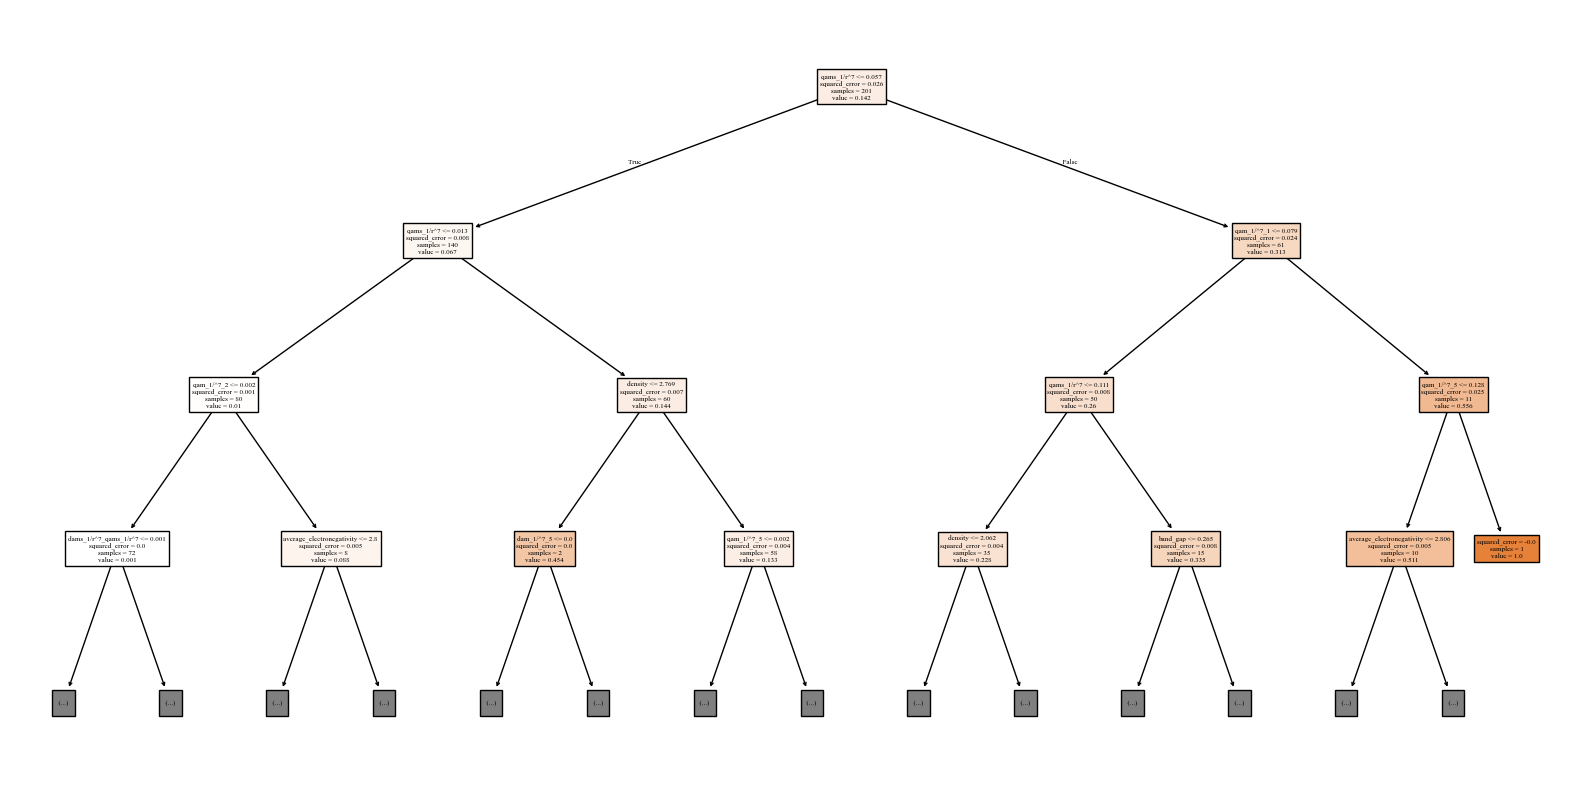

In [108]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

columns_to_use_1 = [
    "dams_1/r^7_qams_1/r^7", "dams_1/r^7", "qams_1/r^7",
    "dam_1/^7_1", "dam_1/^7_2", "dam_1/^7_5",
    "qam_1/^7_1", "qam_1/^7_2", "qam_1/^7_5",
    "band_gap", "density", "average_electronegativity", "normed_space_group_number"
]


columns_to_use = columns_to_use_1

X = factor_df[columns_to_use]

# Declare y
y = spectra_df["sams"]

# Ensure X and y are aligned
X, y = X.align(y, axis=0)

# Convert all data to numeric
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')


# Drop any rows with NaN values in X or y
X = X.dropna()
y = y.loc[X.index]  # Ensure the index alignment is maintained

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create and fit the decision tree regressor
tree = DecisionTreeRegressor(max_depth=5, random_state=42)  # You can adjust max_depth for complexity
tree.fit(X_train, y_train)

# Make predictions
y_pred = tree.predict(X_test)

# Evaluate the model

# Print the R-squared value
print(f"R-squared: {r2_score(y_test, y_pred)}")

#Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Mean Absolute Percentage Error
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")

# Optionally: Visualize the tree (requires graphviz)
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=X.columns, filled=True, max_depth=3)
plt.savefig("tree.pdf")


#### Plot the predicted against test

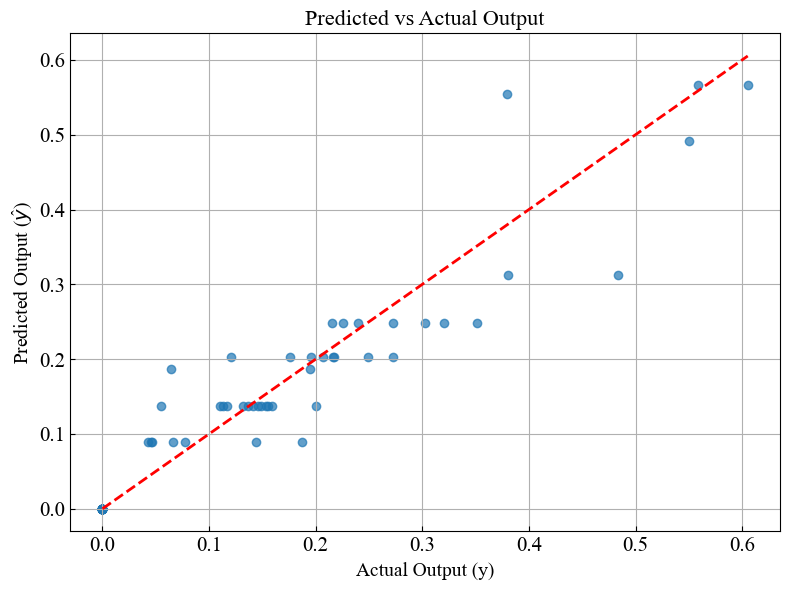

In [109]:
# Plot predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Output (y)", fontsize=14)
plt.ylabel("Predicted Output ($\hat{y}$)", fontsize=14)
plt.title("Predicted vs Actual Output", fontsize=16)
plt.grid(True)

plt.tight_layout()
plt.show()

## Random forest approach

In [112]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

def train_rf(X, y, tune=False, fixed_params=None):
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    if tune:
        # Grid search
        param_grid = {
            'n_estimators': [50, 100],
            'max_depth': [None, 5],
            'min_samples_leaf': [2, 4],
            'min_samples_split': [2, 5],
            'max_features': ['sqrt', 'log2'],
            'bootstrap': [True]
        }
        grid = GridSearchCV(
            RandomForestRegressor(random_state=42, n_jobs=-1),
            param_grid,
            cv=5,
            scoring='r2',
            verbose=1,
            n_jobs=-1
        )
        grid.fit(X_train, y_train)
        model = grid.best_estimator_
        print("Best parameters:", grid.best_params_)
    else:
        # Use fixed parameters
        if fixed_params is None:
            fixed_params = {
                'n_estimators': 100,
                'max_depth': None,
                'min_samples_leaf': 2,
                'min_samples_split': 5,
                'max_features': 'sqrt',
                'bootstrap': True
            }
        model = RandomForestRegressor(**fixed_params, random_state=42, n_jobs=-1)
        model.fit(X_train, y_train)

    # Evaluate
    y_pred = model.predict(X_test)
    print(f"R²: {r2_score(y_test, y_pred):.4f}")
    print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
    print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred):.4f}")

    return model

# Train the Random Forest model without hyperparameter tuning
fixed_params = {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
rf_model = train_rf(X, y, tune=False, fixed_params=fixed_params )

y_pred_rf = rf_model.predict(X_test)

R²: 0.9137
MSE: 0.0020
MAE: 0.0273
MAPE: 14.7444


Plot the random forest predicitons for the best hyper parameters

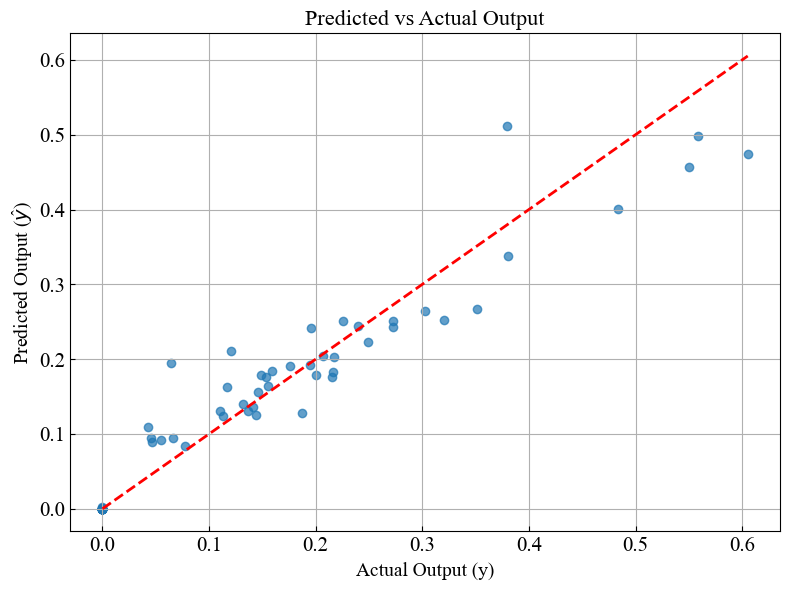

In [113]:
# Plot predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Output (y)", fontsize=14)
plt.ylabel("Predicted Output ($\hat{y}$)", fontsize=14)
plt.title("Predicted vs Actual Output", fontsize=16)
plt.grid(True)

plt.tight_layout()
plt.show()